# Desafio Nº1

**Integrantes**:
- Santiago Belen. 

### Consigna

**1**. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.

**2**. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial
y ComplementNB.

**3**. Transponer la matriz documento-término. De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares. **La elección de palabras no debe ser al azar para evitar la aparición de términos poco interpretables, elegirlas "manualmente"**.


### Vectorización de texto y modelo de clasificación Naïve Bayes con el dataset 20 newsgroups

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import textwrap
import matplotlib.pyplot as plt
import io
import base64
from IPython.display import Image, display

### Carga de datos

In [2]:
# Cargar el conjunto de entrenamiento y prueba del dataset 20 Newsgroups
# Se eliminan encabezados, pies de página y citas
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

### Vectorización

In [3]:
# Instanciar un vectorizador TF-IDF
tfidfvect = TfidfVectorizer()

In [4]:
# Acceder al primer documento de texto del conjunto de entrenamiento
print(newsgroups_train.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [5]:
# Ajustar el vectorizador TF-IDF al texto de entrenamiento:
X_train = tfidfvect.fit_transform(newsgroups_train.data)

In [6]:
print(type(X_train))  
print(f'shape: {X_train.shape}')  
print(f'Cantidad de documentos: {X_train.shape[0]}')
print(f'Tamaño del vocabulario (dimensionalidad de los vectores): {X_train.shape[1]}') 


<class 'scipy.sparse._csr.csr_matrix'>
shape: (11314, 101631)
Cantidad de documentos: 11314
Tamaño del vocabulario (dimensionalidad de los vectores): 101631


In [7]:
# Acceder al índice asignado a la palabra 'car'
tfidfvect.vocabulary_['car']


25775

In [8]:
# Crear ese diccionario invirtiendo claves y valores del vocabulario original
idx2word = {v: k for k, v in tfidfvect.vocabulary_.items()}

In [9]:
# Guardar las etiquetas (targets) del conjunto de entrenamiento en y_train
y_train = newsgroups_train.target
y_train[:10]


array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4], dtype=int64)

In [10]:
# Mostrar los valores únicos de las etiquetas del conjunto de prueba (van de 0 a 19)
print(f'clases {np.unique(newsgroups_test.target)}')

# Mostrar nombres de las etiquetas
for i, name in enumerate(newsgroups_test.target_names):
    print(f"{i}: {name}")


clases [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
0: alt.atheism
1: comp.graphics
2: comp.os.ms-windows.misc
3: comp.sys.ibm.pc.hardware
4: comp.sys.mac.hardware
5: comp.windows.x
6: misc.forsale
7: rec.autos
8: rec.motorcycles
9: rec.sport.baseball
10: rec.sport.hockey
11: sci.crypt
12: sci.electronics
13: sci.med
14: sci.space
15: soc.religion.christian
16: talk.politics.guns
17: talk.politics.mideast
18: talk.politics.misc
19: talk.religion.misc


### Similaridad de documentos

In [11]:
# Explorar la similitud entre documentos.
idx = 4811  

title = f"Documento idx: {idx} (clase: {newsgroups_train.target_names[y_train[idx]]})"
print("=" * len(title))
print(title)
print("=" * len(title))
print("\n".join(textwrap.wrap(newsgroups_train.data[idx][:1000], width=100)))

Documento idx: 4811 (clase: talk.politics.misc)
THE WHITE HOUSE                    Office of the Press Secretary                    (Pittsburgh,
Pennslyvania) ______________________________________________________________ For Immediate Release
April 17, 1993                                       RADIO ADDRESS TO THE NATION
BY THE PRESIDENT                               Pittsburgh International Airport
Pittsburgh, Pennsylvania                             10:06 A.M. EDT
THE PRESIDENT:  Good morning.  My voice is coming to you this morning through the facilities of the
oldest radio station in America, KDKA in Pittsburgh.  I'm visiting the city to meet personally with
citizens here to discuss my plans for jobs, health care and the economy.  But I wanted first to do
my weekly broadcast with the American people.                             I'm told this station
first broadcast in 1920 when it reported that year's presidential elec


In [12]:
# Medir la similaridad coseno con todos los documentos de train
cossim = cosine_similarity(X_train[idx], X_train)[0]

# Ordenar los valores de similaridad de mayor a menor
np.sort(cossim)[::-1]

array([1.        , 0.70930477, 0.67474953, ..., 0.        , 0.        ,
       0.        ])

In [13]:
# Obtener los índices de los documentos ordenados por similaridad con `idx`
np.argsort(cossim)[::-1]

array([ 4811,  6635,  4253, ...,  1534, 10055,  4750], dtype=int64)

In [14]:
# Obtener los índices de los 5 documentos más similares al documento `idx`
mostsim = np.argsort(cossim)[::-1][1:6]
mostsim

array([6635, 4253, 3596, 4271, 3746], dtype=int64)

In [15]:
# Obtener el nombre de la clase (categoría de texto) del documento original (`idx`)
newsgroups_train.target_names[y_train[idx]]

'talk.politics.misc'

In [16]:
# Imprimir las clases (nombres de categorías) de los 5 documentos más similares
for i in mostsim:
  print(newsgroups_train.target_names[y_train[i]])

talk.politics.misc
talk.politics.misc
talk.politics.misc
talk.politics.misc
talk.politics.misc


### Modelo de clasificación Naïve Bayes

In [17]:
# Instanciar y entrenar un modelo de clasificación Naïve Bayes multinomial con sklearn
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [18]:
# Usar el vectorizador TF-IDF ya entrenado con el conjunto de entrenamiento
# para transformar los textos del conjunto de prueba
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred = clf.predict(X_test)

In [19]:
# Calcular el F1-score macro entre las etiquetas reales y las predichas
f1_score(y_test, y_pred, average='macro')

0.5854345727938506

### Consigna del desafío 1

**1**. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.

**2**. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial
y ComplementNB.

**3**. Transponer la matriz documento-término. De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares. **La elección de palabras no debe ser al azar para evitar la aparición de términos poco interpretables, elegirlas "manualmente"**.


## Parte 1.1 Vectorizar documentos
Tomar 5 documentos al azar y medir similaridad con el resto de los documentos. Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido la similaridad según el contenido del texto y la etiqueta de clasificación.

In [20]:
# Elegir 5 documentos al azar
np.random.seed(42)
random_docs = np.random.choice(len(newsgroups_train.data), size=5, replace=False)
print(random_docs)

[7492 3546 5582 4793 3813]


In [21]:
# Visualizar contenido
for i, idx in enumerate(random_docs, 1):
    title = f"Documento {i} (idx: {idx}, clase: {newsgroups_train.target_names[y_train[idx]]})"
    print("=" * len(title))
    print(title)
    print("=" * len(title))
    print("\n".join(textwrap.wrap(newsgroups_train.data[idx], width=100))[:10000])
    print("\n" + "-" * 100 + "\n")

Documento 1 (idx: 7492, clase: comp.sys.mac.hardware)
Could someone please post any info on these systems.  Thanks. BoB --
----------------------------------------------------------------------  Robert Novitskey | "Pursuing
women is similar to banging one's head rrn@po.cwru.edu  |  against a wall...with less opportunity
for reward"

----------------------------------------------------------------------------------------------------

Documento 2 (idx: 3546, clase: comp.os.ms-windows.misc)
       Don't bother if you have CPBackup or Fastback.  They all offer options  not available in the
stripped-down MS version (FROM CPS!).  Examples - no  proprietary format (to save space), probably
no direct DMA access, and no  tape drive!

----------------------------------------------------------------------------------------------------

Documento 3 (idx: 5582, clase: misc.forsale)
5.25" Internal Low density disk drive.  Monochrome monitor  8088 motherboard, built in parallel and
serial ports, buil

In [22]:
# Calcular la similaridad con todos los demás documentos

similar_docs_dict = {}

for idx in random_docs:
    doc_vector = X_train[idx]
    similarities = cosine_similarity(doc_vector, X_train)[0]
    most_similar_idx = np.argsort(similarities)[::-1][1:6]
    similar_docs_dict[idx] = most_similar_idx  # guardar los similares para cada documento
    print(f"\n--- Documento base: {idx} ({newsgroups_train.target_names[y_train[idx]]}) ---")
    for i in most_similar_idx:
        print(f"Similitud: {similarities[i]:.2f} | idx: {i} | Clase: {newsgroups_train.target_names[y_train[i]]}")



--- Documento base: 7492 (comp.sys.mac.hardware) ---
Similitud: 0.67 | idx: 10935 | Clase: comp.sys.mac.hardware
Similitud: 0.35 | idx: 7258 | Clase: comp.sys.ibm.pc.hardware
Similitud: 0.18 | idx: 4971 | Clase: comp.sys.mac.hardware
Similitud: 0.15 | idx: 4303 | Clase: misc.forsale
Similitud: 0.14 | idx: 645 | Clase: comp.sys.mac.hardware

--- Documento base: 3546 (comp.os.ms-windows.misc) ---
Similitud: 0.20 | idx: 5665 | Clase: comp.sys.ibm.pc.hardware
Similitud: 0.19 | idx: 2011 | Clase: comp.sys.ibm.pc.hardware
Similitud: 0.17 | idx: 8643 | Clase: comp.sys.ibm.pc.hardware
Similitud: 0.17 | idx: 1546 | Clase: comp.sys.ibm.pc.hardware
Similitud: 0.16 | idx: 8765 | Clase: comp.sys.ibm.pc.hardware

--- Documento base: 5582 (misc.forsale) ---
Similitud: 0.46 | idx: 5510 | Clase: misc.forsale
Similitud: 0.30 | idx: 4922 | Clase: misc.forsale
Similitud: 0.27 | idx: 4347 | Clase: comp.graphics
Similitud: 0.21 | idx: 8057 | Clase: misc.forsale
Similitud: 0.17 | idx: 4028 | Clase: comp.gra

In [23]:
# Leer los documentos más similares
for base_idx, similar_indices in similar_docs_dict.items():
    print(f"\n########## Documentos similares a {base_idx} ({newsgroups_train.target_names[y_train[base_idx]]}) ##########\n")
    for i, idx in enumerate(similar_indices, 1):
        title = f"Documento similar {i} (idx: {idx}, clase: {newsgroups_train.target_names[y_train[idx]]})"
        print("=" * len(title))
        print(title)
        print("=" * len(title))
        print("\n".join(textwrap.wrap(newsgroups_train.data[idx], width=100))[:500])
        print("\n" + "-" * 100 + "\n")


########## Documentos similares a 7492 (comp.sys.mac.hardware) ##########

Documento similar 1 (idx: 10935, clase: comp.sys.mac.hardware)
Hey everybody:     I want to buy a mac and I want to get a good price...who doesn't?  So, could
anyone out there who has found a really good deal on a Centris 650 send me the price.  I don't want
to know where, unless it is mail order or areound cleveland, Ohio.  Also, should I buy now or wait
for the Power PC.  Thanks. BoB reply via post or e-mail at rrn@po.cwru.edu --
----------------------------------------------------------------------  Robert Novitskey | "Pursuing
women is similar to bangin

----------------------------------------------------------------------------------------------------

Documento similar 2 (idx: 7258, clase: comp.sys.ibm.pc.hardware)
Hay all:      Has anyone out there heard of any performance stats on the fabled p24t.  I was
wondering what it's performance compared to the 486/66 and/or pentium would be.  Any info would be


#### Analisis
#### idx: 7492 comp.sys.mac.hardware
| Documento | Clase                    | Similitud temática | Comentario breve                      |
|-----------|--------------------------|--------------------|---------------------------------------|
| 10935     | comp.sys.mac.hardware    | Alta             | Mismo autor, mismo tema.              |
| 7258      | comp.sys.ibm.pc.hardware | Parcial         | Mismo autor, diferente clase.    |
| 4971      | comp.sys.mac.hardware    | Alta             | Consulta técnica.           |
| 4303      | misc.forsale             | Baja             | No tiene relación.    |
| 645       | comp.sys.mac.hardware    | Alta             | Consulta sobre procesadores Mac.      |


#### idx: 3546 comp.os.ms-windows.misc
| Documento | Clase                    | Similitud temática | Comentario breve                                        |
|-----------|--------------------------|--------------------|---------------------------------------------------------|
| 5665      | comp.sys.ibm.pc.hardware | Parcial         | Tema DMA, pero centrado en hardware.    |
| 2011      | comp.sys.ibm.pc.hardware | Parcial         | Tema DMA y DOS.|
| 8643      | comp.sys.ibm.pc.hardware | Parcial         | Tema DMA, sin relación a Windows.      |
| 1546      | comp.sys.ibm.pc.hardware | Parcial         | Tema DOS |
| 8765      | comp.sys.ibm.pc.hardware | Parcial         | Tema DMA, enfoque técnico.      |

#### idx: 5582 misc.forsale
| Documento | Clase            | Similitud temática | Comentario breve                                             |
|-----------|------------------|--------------------|--------------------------------------------------------------|
| 5510      | misc.forsale     | Alta             | Misma firma, items similares.  |
| 4922      | misc.forsale     | Alta             | Misma firma, venta de Game Boy.    |
| 4347      | comp.graphics    | Baja             | Contenido técnico sin relación con ventas.                   |
| 8057      | misc.forsale     | Alta             | Venta de hardware.   |
| 4028      | comp.graphics    | Baja             | Consulta técnica, sin relacion con ventas.       |


#### idx: 4793 talk.politics.guns
| Documento | Clase            | Similitud temática | Comentario breve                                                    |
|-----------|------------------|--------------------|----------------------------------------------------------------------|
| 6894      | talk.politics.guns | Alta           | Debate sobre control de armas.     |
| 5856      | sci.crypt         | Baja           | Criptografía y seguridad, no relacionado con armas.                 |
| 4271      | talk.politics.misc| Parcial       | Político, pero no sobre armas.                                      |
| 3141      | talk.politics.guns| Alta           | Debate sobre abuso de leyes de control de armas.     |
| 10836     | alt.atheism       | Baja           | Temática religiosa/filosófica.  |


#### idx: 3813 rec.sport.hockey
| Documento | Clase                 | Similitud temática | Comentario breve                                                |
|-----------|-----------------------|--------------------|-----------------------------------------------------------------|
| 10836     | alt.atheism           | Baja             | Sin relación con deporte.        |
| 759       | soc.religion.christian| Baja             | Sin relación con deporte.          |
| 913       | alt.atheism           | Baja             | Sin relación con deporte.         |
| 5826      | soc.religion.christian| Baja             | Sin relación con deporte.  |
| 5856      | sci.crypt             | Baja             | Sin relación con deporte.     |


#### Conclusion:
El desempeño del método de similitud coseno aplicado sobre estos documentos muestra un patrón mixto, con buenos resultados en algunos casos y fallos importantes en otros. 
Impresiona que el texto de las firmas de los usuarios (al ser palabras que se repiten con el documento base), puede inclinar la similitud. 
Llama la atención el documento final 3813 rec.sport.hockey, donde la firma del usuario menciona la palabra profanity, siendo los documentos catalogados como similares en su gran mayoría de característica religiosa o sobre ateísmo.


---

## Parte 1.2 Entrenar modelos
Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial
y ComplementNB.

---

Se evaluarán distintas configuraciones del vectorizador TfidfVectorizer y dos modelos de clasificación bayesiana: MultinomialNB y ComplementNB.
- Vectorizador:
    - ngram_range: unigramas (1, 1) o  bigramas (1, 2) para evaluar si puede capturar mejor el contexto semántico 
    - min_df: 1 o 5 para observar el efecto de eliminar términos poco frecuentes
    - max_df: 1.0 o 0.75 para analizar cómo afecta descartar términos demasiado comunes
- Clasificadores:
    - MultinomialNB
    - ComplementNB

In [24]:

resultados = []

# Parámetros a testear
ngramas = [(1, 1), (1, 2)]
min_dfs = [1, 5]
max_dfs = [1.0, 0.75]
modelos = [
    ("MultinomialNB", MultinomialNB(alpha=1.0)),
    ("ComplementNB", ComplementNB(alpha=1.0))
]

for ngram in ngramas:
    for min_df in min_dfs:
        for max_df in max_dfs:
            for nombre_modelo, modelo in modelos:
                pipe = make_pipeline(
                    TfidfVectorizer(ngram_range=ngram, min_df=min_df, max_df=max_df),
                    modelo
                )
                pipe.fit(newsgroups_train.data, newsgroups_train.target)
                y_pred = pipe.predict(newsgroups_test.data)
                score = f1_score(newsgroups_test.target, y_pred, average='macro')

                resultados.append({
                    'modelo': nombre_modelo,
                    'ngram_range': ngram,
                    'min_df': min_df,
                    'max_df': max_df,
                    'f1_macro': score
                })

import pandas as pd
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='f1_macro', ascending=False)
df_resultados.reset_index(drop=True, inplace=True)

from IPython.display import display
display(df_resultados.head(10))

,modelo,ngram_range,min_df,max_df,f1_macro
0,ComplementNB,"(1, 1)",1,1.00,0.692953
1,ComplementNB,"(1, 1)",1,0.75,0.692047
2,ComplementNB,"(1, 2)",5,1.00,0.684100
3,ComplementNB,"(1, 2)",5,0.75,0.683960
4,ComplementNB,"(1, 1)",5,1.00,0.683773
5,ComplementNB,"(1, 1)",5,0.75,0.683751
6,ComplementNB,"(1, 2)",1,1.00,0.681684
7,ComplementNB,"(1, 2)",1,0.75,0.681649
8,MultinomialNB,"(1, 1)",5,0.75,0.613185
9,MultinomialNB,"(1, 1)",5,1.00,0.609759


#### Conclusion:
El modelo ComplementNB supera consistentemente a MultinomialNB en todas las combinaciones de parámetros, obteniendo valores de F1-score macro significativamente más altos
Se observa que agregar bigramas, filtrar términos frecuentes o poco frecuentes no mejora el rendimiento, por otro lado incluir todos los términos (min_df=1) es beneficioso.

---

## Parte 1.3 Estudiar ahora similaridad entre palabras
Transponer la matriz documento-término. Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares. **La elección de palabras no debe ser al azar para evitar la aparición de términos poco interpretables, elegirlas "manualmente"**.

In [25]:
# Palabras a analizar
palabras = ['space', 'god', 'bike', 'graphics', 'hockey']

# 1. Vectorizar y transponer
vectorizador = TfidfVectorizer(
    ngram_range=(1,1),
    stop_words='english',
    min_df=5,
    max_df=0.75
)
X = vectorizador.fit_transform(newsgroups_train.data)
X_td = X.T

# 2. Mapeos de índice-palabra
word2idx = vectorizador.vocabulary_
idx2word = {i: w for w, i in word2idx.items()}

# 3. Crear lista de resultados
resultados = []

for palabra in palabras:
    if palabra not in word2idx:
        continue

    idx = word2idx[palabra]
    vec = X_td[idx]
    sim = cosine_similarity(vec, X_td)[0]
    top_sim_idx = np.argsort(sim)[::-1][1:6]

    for sim_idx in top_sim_idx:
        resultados.append({
            'Palabra base': palabra,
            'Palabra similar': idx2word[sim_idx],
            'Similitud': round(sim[sim_idx], 3)
        })

df_resultados = pd.DataFrame(resultados)


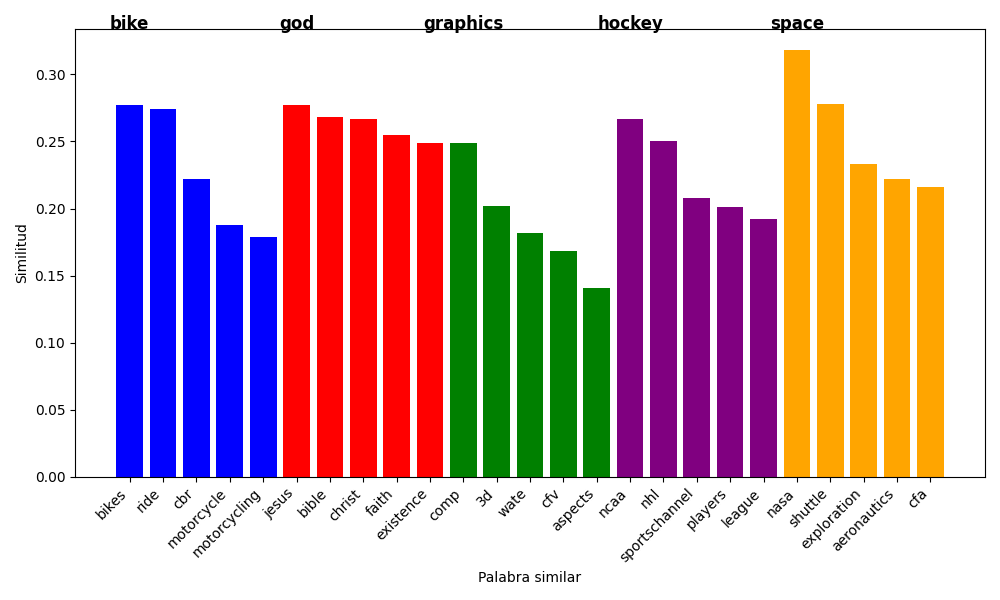

In [26]:

# Agrupar el DataFrame por palabra base
grupos = df_resultados.groupby('Palabra base')
colores = ['blue', 'red', 'green', 'purple', 'orange']

fig, ax = plt.subplots(figsize=(10, 6))
x_labels = []
x_pos = []
y_vals = []
bar_colors = []
grupo_texts = []

x = 0
for i, (grupo, datos) in enumerate(grupos):
    palabras_similares = datos['Palabra similar'].tolist()
    similitudes = datos['Similitud'].tolist()

    for palabra, similitud in zip(palabras_similares, similitudes):
        x_labels.append(palabra)
        x_pos.append(x)
        y_vals.append(similitud)
        bar_colors.append(colores[i % len(colores)])
        grupo_texts.append(grupo)
        x += 1

ax.bar(x_pos, y_vals, color=bar_colors)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_ylabel("Similitud")
ax.set_xlabel("Palabra similar")

# Etiquetas de grupo 
prev = None
for i, grupo in enumerate(grupo_texts):
    if grupo != prev:
        ax.text(i, max(y_vals)*1.05, grupo, ha='center', fontsize=12, fontweight='bold')
        prev = grupo

plt.tight_layout()

# Guardar y mostrar
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
display(Image(data=buf.getvalue()))
plt.close()


#### Conclusion:
El análisis muestra buena coherencia temática en la mayoría de las palabras base, especialmente en god, bike y hockey.